# 🎓 Reproducing Across-subject ensemble-learning alleviates the need for large samples for fMRI decoding Paper

Welcome to this **step-by-step guide** for **reproducing the results** of the paper **"Across-subject ensemble-learning alleviates the need for large samples for fMRI decoding"**! This guide will walk through the process of setting up, running, and verifying the paper's experiments.  

## 🔹 Steps to Reproduce:  
1. **Clone the repository** – Download the official code and set up the project.  
2. **Set up the environment** – Install dependencies and configure necessary settings.  
3. **Download and preprocess datasets** – Retrieve validation datasets and process them correctly.  
4. **Run experiments and reproduce results** – Validate key figures or tables from the paper.  

Let's get started and replicate the findings! 🚀  


## Summary of the paper: 
The paper presents an ensemble learning method to decode cognitive states from fMRI data, using classifiers trained on multiple subjects to predict for a new subject. Tested on five datasets, it showed up to 20% better accuracy than traditional methods, especially with limited data per subject. Full-voxel features worked better, and the Multi-layer Perceptron (MLP) was the most effective classifier. The approach reduces the need for large sample sizes and highlights how ensemble learning can improve decoding in low-data scenarios. It shows promise for cognitive research and real-time applications like brain-computer interfaces.

## Challenges Encountered: 

1. Running the script on my laptop required approximately 72 hours to complete, as it utilizes only the CPU, as mentioned in the paper.
2. To speed up the process, I need access to a GPU. I created an account on the FAU Remote CIP Pool and set up a directory under my IDM ID.
3. I then began working on the project by cloning the GitHub repository.
4. For the environment setup, I encountered challenges due to incomplete instructions in the README.md file. The Conda environment required significant storage, and I had to install  the required pip packages separately to address version compatibility issues.
5. I tried 3 different python version (3.7, 3.10, 3.8) because in github, they did not mention it specifically.
6. In github, they mentioned about two environment set up files (ensemblepy.yml, cuda.yml) but only described about ensemblepy.yml that need more time to run. But in conda, I used cuda.yml that gave me so many errors that they did not describe in github.

> Initially, this project was categorized as Level 1 in my proposal. However, after working on it and discussing the challenges I encountered with **Noah** during the exercise session on December 19th, I acknowledged and agreed that it should be classified as **Level 2**.

## 🔹No. 1: Clone the GitHub Repository 🛠️

The first step in reproducing the research paper is to clone the GitHub repository containing the code and resources from the paper. Below are the steps for cloning the repository to your **Remote machine**.

### A. **Cloning on Your Remote Machine** 🖥️

1. Open your terminal on Visual Studio Prompt (Windows).
2. Go to the working folder.

   ```zsh
    cd /proj/ciptmp
    cd ev72erij

   ```
3. Step 1 will create a folder in my current directory with the same name as the repository (e.g., ensemble-fmri). You can navigate into the folder using:
   
   ```zsh
   cd ensemble-fmri
    
   
4. Run the following command to clone the repository:

   ```zsh
   git clone https://github.com/man-shu/ensemble-fmri/tree/main
   
  This will create a local copy of the repository on FAU Remote machine.




## 🔹No. 2: Set Up the Environment ⚙️

After cloning the repository, the next step is to set up the environment where the code will run. This typically involves installing dependencies.

While a requirements.txt file is not provided, a file named **cuda.yml** is included under the env folder, which contains all the necessary packages.
### Manually Resolving Dependencies 🔧

After running the **ensemblepy.yml** file, errors may occur due to missing pip packages or version conflicts. These issues will require manual resolution.

1. Run the following command in the terminal:
         ```
           conda env create -f ./ensemble-fmri/env/cuda.yml 
        ```

2. If errors occur (e.g., missing packages or version conflicts), note down the names of the problematic packages.

  
3. Use pip to manually install the missing packages. For example:
   
   - With `pip`:
     ```bash
     pip install defusedxml==0.7.1
     
     pip install torch torch-geometric
     ```

4. Repeat this process for any other missing or conflicting dependencies until the environment is successfully set up.

> Since you are working on a **remote machine**, it is recommended to create a virtual environment (using venv or conda) to keep project dependencies isolated.
To activate the environment, run:
   ```bash
      conda activate ensemble_gpu 
   ```


## 🔹No 3: Reproducing the *Across-subject ensemble-learning alleviates the need for large samples for fMRI decoding* Paper 🎓


Link to Paper's Github Repo https://github.com/man-shu/ensemble-fmri/tree/main 



## 📁 Directory Structure for Data Organization

The data structure should be as follows:

```bash
data/neuromod
└── 3mm
    ├── sub-01.nii.gz
    ├── sub-01_labels.csv
    ├── sub-01_runs.csv
    ├── sub-02.nii.gz
    ├── sub-02_labels.csv
    ├── sub-02_runs.csv
    ├── sub-03.nii.gz
    ├── sub-03_labels.csv
    ├── sub-03_runs.csv
    ├── sub-05.nii.gz
    ├── sub-05_labels.csv
    └── sub-05_runs.csv
```





### 📝 Explanation of the Structure:

Note: Here I work with only `neuromod` Dataset.

1. Under `data`, need to create a sub-directory with the name of your dataset e.g. `neuromod` in this case.

2. This sub-directory should contain another sub-directory named as resolution of the data e.g. `3mm` in this case. Note that we downsampled all our data to 3mm resolution because it is computationally expensive to work with the full resolution data.

3. The `3mm` directory should contain the effect size maps for each subject. The effect size maps should be in the nifti format. The filenames should be in the format `<subject_id>.nii.gz` e.g. `sub-01.nii.gz` in this case. The subject_id in itself could be anything as long as it is unique for each file. Each volume in this 4D nifti file should correspond to an event in the task. All runs should be concatenated in this one nifti file.

4. The `3mm` directory should also contain the labels for each subject. The labels should be in a CSV file. The filenames should be in the format `<subject_id>_labels.csv` e.g. `sub-01_labels.csv` in this case. The CSV file should have one column without any header. The column should contain the labels for each event/volume in nifti file.

5. Finally,  just need to add the name of `neuromod` in all the scripts.

    For example, in `scripts/vary_train_size.py`, need to add `neuromod` name in  the `datas` list as follows:

    ```python
    # in lines 42-48
    datas = [
        "neuromod",
        "forrest",
        "rsvp",
        "bold",
        "aomic_anticipation",
        "your_dataset_name"
    ]
    ```

    Here, In the vary_train_size.py file, need to remove the other datasets as I am only interested in `neuromod` dataset. That's why I have to edit this file where other dataset are used.


In this phase, walk through the steps to reproduce the results from the *Across-subject ensemble-learning alleviates the need for large samples for fMRI decoding* paper using the cloned repository.

## 🔹No 4: Run main experiments

Once the environment is set up, to generate numbers plotted in Fig 2 and Fig 3 (over varying training sizes) in the paper:

* using the data in the `data` directory, saving the results in the `results` directory, with 20 parallel jobs, and DiFuMo features, run:

    ```bash
    python scripts/vary_train_size.py data results 20 difumo
    ```

This script generates accuracy and balanced accuracy plots for varying training sizes using fMRI data and DiFuMo features. Results, including performance metrics and visualizations, are saved in the results directory for analysis.


### Plot the results

To plot Figures 2 and 3 in the paper, run:

```bash
python scripts/plotting/plot_fig2_fig3.py
```


## 📊 Evaluation Results

After running the evaluation script, the following result is obtained for only `neuromod` dataset only for DiFuMo:

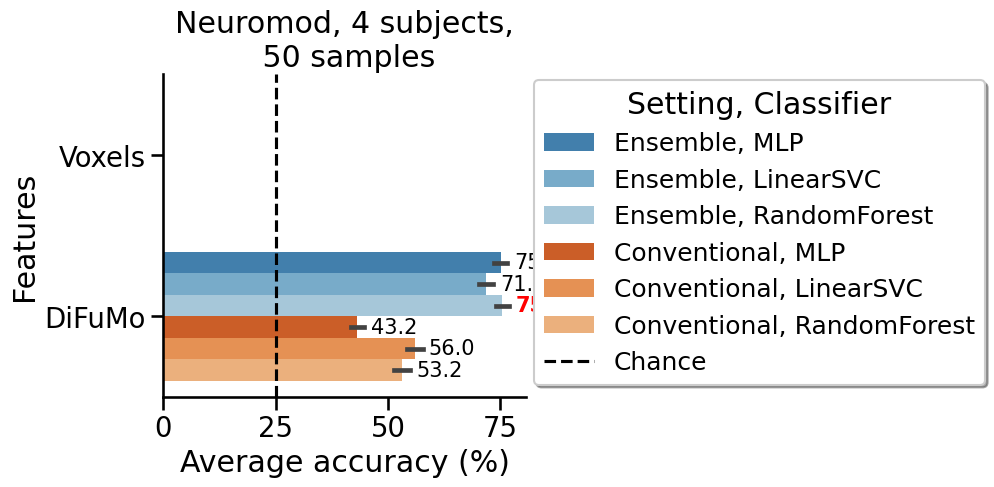


## 📊 Comparison of Evaluation Results

### 📝 Comparison with Paper's Results

Below is the comparison of the evaluation results reported in the paper at `fig 2` for all the datasets.

#### Paper Reported Results:
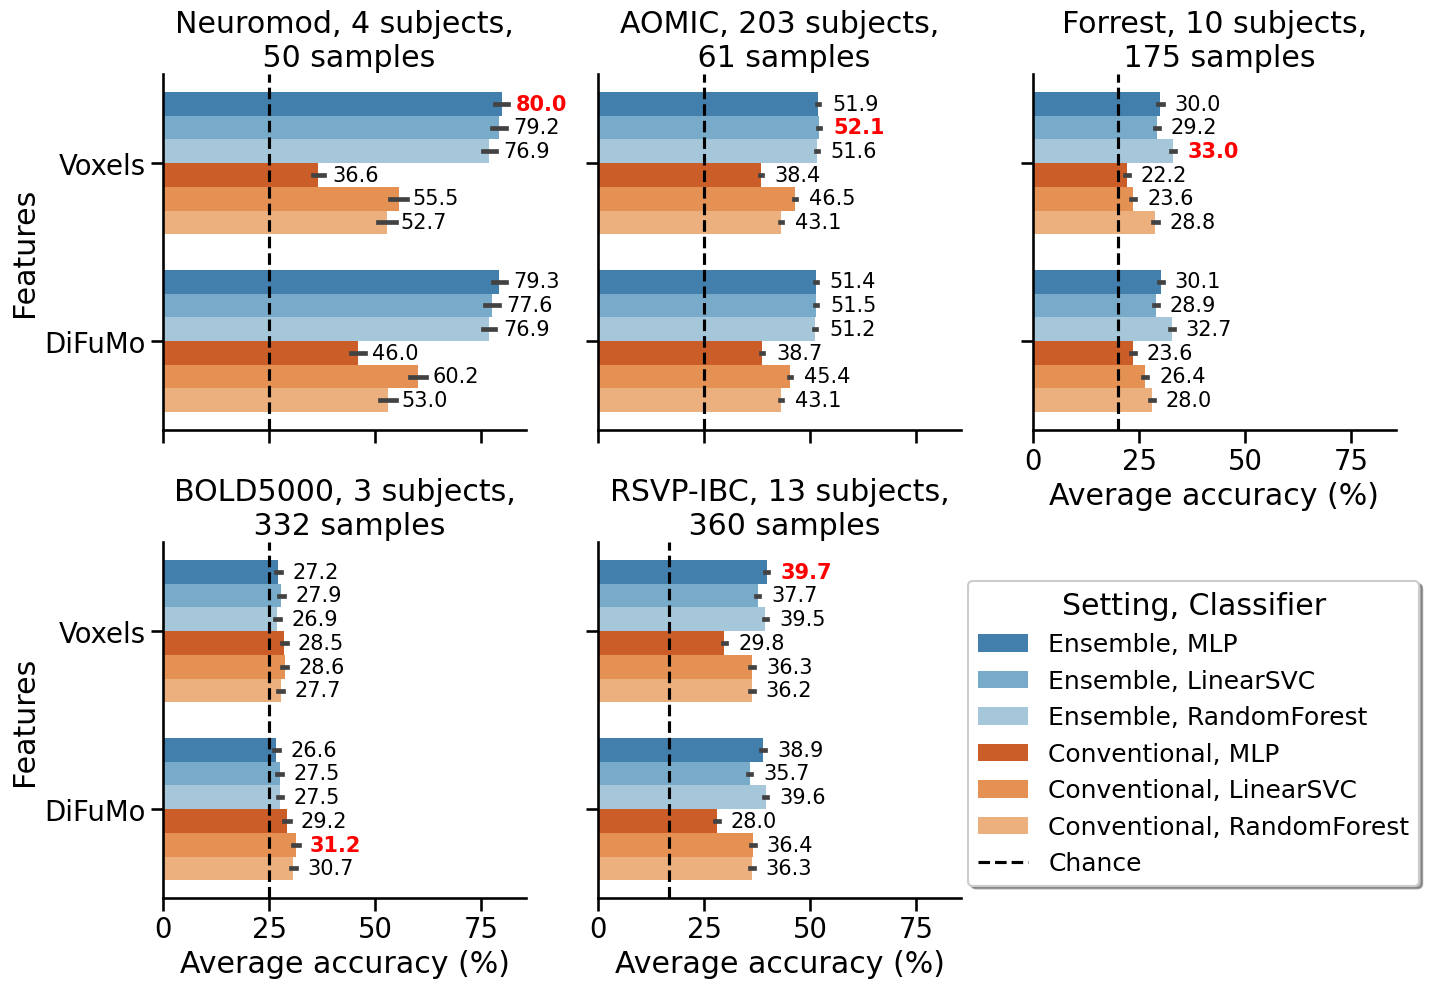

The Neuromod dataset consistently achieves the highest classification accuracy across both figures, particularly with Voxel features and an Ensemble MLP classifier. In the single-dataset analysis, the best accuracy reaches 75+%, while in the multi-dataset comparison, it improves to 80.0%, outperforming all other datasets. Voxels consistently outperform DiFuMo features, indicating richer information for classification. Compared to datasets like AOMIC, Forrest, and BOLD5000, Neuromod benefits from a smaller but well-controlled sample size (4 subjects, 50 samples), leading to superior performance. Overall, Neuromod demonstrates the strongest classification performance, confirming the advantage of deep-learning-based Ensemble MLP models. 🚀